# Stock Forecasting using pmdarima (Auto ARIMA Model)

https://github.com/alkaline-ml/pmdarima



In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pmdarima as pm
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt

import yfinance as yf
yf.pdr_override()

In [2]:
stock = 'AMD' # input
start = '2021-01-01' # input 
end = '2021-11-22'  # input
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,92.110001,96.059998,90.919998,92.300003,92.300003,51802600
2021-01-05,92.099998,93.209999,91.410004,92.769997,92.769997,34208000
2021-01-06,91.620003,92.279999,89.459999,90.330002,90.330002,51911700
2021-01-07,91.330002,95.510002,91.199997,95.160004,95.160004,42897200
2021-01-08,95.980003,96.400002,93.269997,94.580002,94.580002,39816400


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-15,148.000000,148.979996,142.860001,146.490005,146.490005,52271300
2021-11-16,145.929993,153.080002,145.339996,152.449997,152.449997,53100800
2021-11-17,151.979996,154.660004,149.690002,151.339996,151.339996,54527500
2021-11-18,157.070007,158.889999,152.559998,155.020004,155.020004,60612700
2021-11-19,155.759995,156.919998,153.449997,155.410004,155.410004,41633400


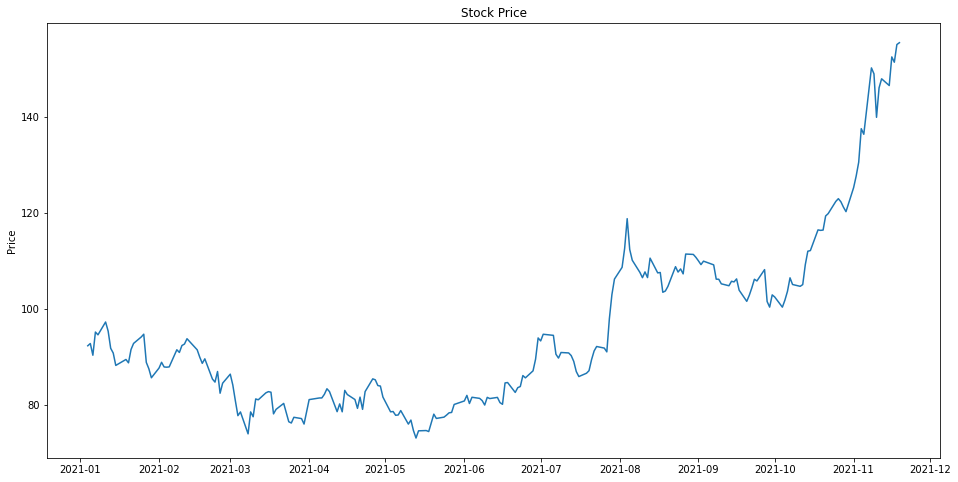

In [5]:
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'])
plt.title('Stock Price')
plt.ylabel('Price')
plt.show()

In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,92.110001,96.059998,90.919998,92.300003,92.300003,51802600
1,2021-01-05,92.099998,93.209999,91.410004,92.769997,92.769997,34208000
2,2021-01-06,91.620003,92.279999,89.459999,90.330002,90.330002,51911700
3,2021-01-07,91.330002,95.510002,91.199997,95.160004,95.160004,42897200
4,2021-01-08,95.980003,96.400002,93.269997,94.580002,94.580002,39816400


In [7]:
train, test = model_selection.train_test_split(df['Adj Close'], train_size=20)

# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=12)

C:\Users\Tin Hang\Anaconda3\lib\site-packages\pmdarima\arima\utils.py:120: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (8) is shorter than m (12). Using D=1
  % (len(x), m, D))


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=50.921, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=50.766, Time=0.04 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=49.277, Time=0.05 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=52.376, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=47.277, Time=0.01 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=49.397, Time=0.03 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=51.370, Time=0.06 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=48.866, Time=0.02 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=nan, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=48.774, Time=0.01 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(0,1,0)[12]             : AIC=47.623, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,1,0)[12] intercept
Total fit time: 1.086 seconds


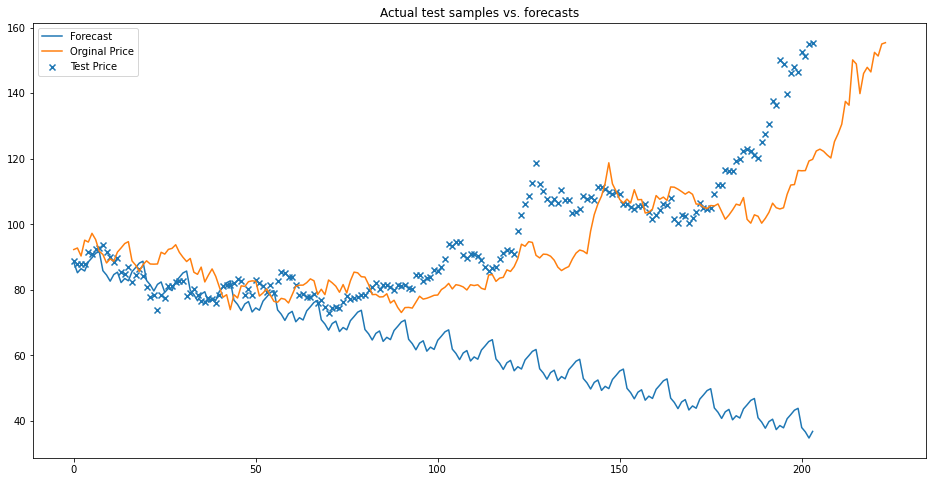

In [8]:
# Plot actual test vs. forecasts:

x = np.arange(test.shape[0])
plt.figure(figsize=(16,8))
plt.scatter(x, test, marker='x', label='Test Price')
plt.plot(x, arima.predict(n_periods=test.shape[0]), label='Forecast')
plt.plot(df['Adj Close'], label='Orginal Price')
plt.title('Actual test samples vs. forecasts')
plt.legend(loc='best')
plt.show()